# Task 6.6 Time Series Analysis

## Task 6.6 Script Table of Contents

__1. Importing libraries and data set__  

__2. Subsetting, wrangling, and cleaning time-series data__  

__3. Time series analysis: decomposition__ 

__4. Testing for stationarity__  

__5. Stationarizing the data set__

## 1. Importing libraries and data set

## 1.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings
plt.style.use('tableau-colorblind10')

## 1.2 Import data set

In [2]:
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project/'

In [3]:
# Import gun violence data set
data = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'Gun Violence_cleaned.csv'), index_col = False)

In [4]:
data.head()

,Unnamed: 0,FIPS Code,gun incident ID,date of gun incident
0,0,42003,461105,2013-01-01
1,1,6037,460726,2013-01-01
2,2,39093,478855,2013-01-01
3,3,8005,478925,2013-01-05
4,4,37081,478959,2013-01-07


In [5]:
data.shape

(231754, 4)

# 2. Subsetting, wrangling, and cleaning time-series data

## 2.1 Wrangle the time series 

In [6]:
# Delete the column 'Unnamed:0' and 'FIPS Code'
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.drop(columns = ['FIPS Code'], inplace = True)

In [7]:
# Create a column with the count of gun incidents
data['gun_incident_count'] = data.groupby('date of gun incident')['gun incident ID'].transform('count')

In [8]:
# Drop 'gun incident ID' variable
data.drop(columns = ['gun incident ID'], inplace = True)

In [9]:
# Check new variable
data.head()

,date of gun incident,gun_incident_count
0,2013-01-01,3
1,2013-01-01,3
2,2013-01-01,3
3,2013-01-05,1
4,2013-01-07,2


In [10]:
# Reset the 'date of gun incident' as the index and smooth data but aggregating gun incidents by month, as a time series by day might have too much noise

# Convert the 'date of gun incident' to datetime format and set it as the index
data['date of gun incident'] = pd.to_datetime(data['date of gun incident'])

In [11]:
# Set the datetime as the index
data.set_index('date of gun incident', inplace = True)

In [12]:
# Resample the data by month and year and sum the aggregation
data_smoothed = data.resample('M').sum()

In [13]:
# Check the smoothed and converted time series
data_smoothed.head()

,gun_incident_count
date of gun incident,
2013-01-31,33
2013-02-28,14
2013-03-31,27
2013-04-30,29
2013-05-31,43


In [14]:
# Check for missing data
data_smoothed.isnull().sum()

gun_incident_count    0
dtype: int64

In [15]:
# Check for duplicate values
data_dups = data_smoothed[data_smoothed.duplicated()]

In [16]:
data_dups

,gun_incident_count
date of gun incident,


## 2.2 Check if subsetting of the data is required

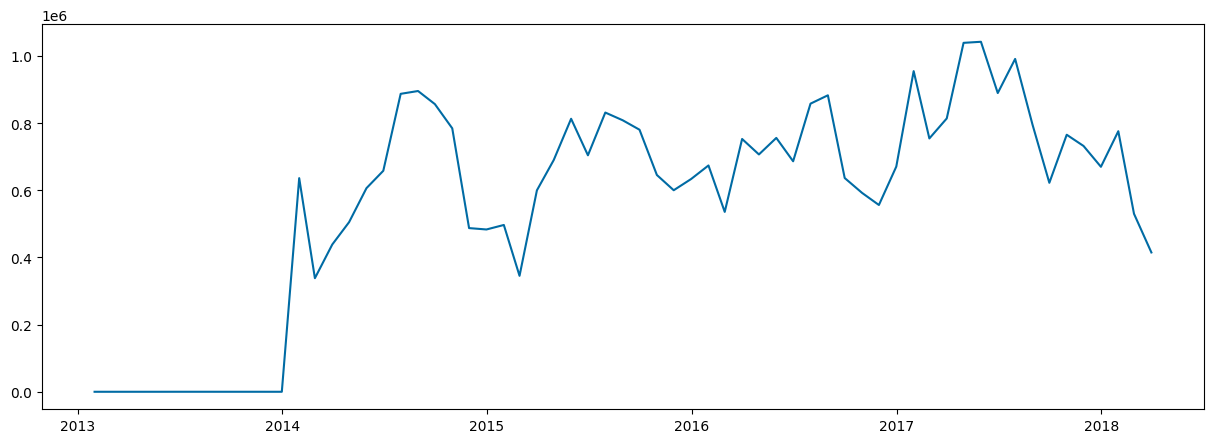

In [17]:
# Plote the data set
plt.figure(figsize = (15,5), dpi=100)
plt.plot(data_smoothed)

__The data set runs for 5 years from January 2013 to March 2018 - which is current with the timeline of the other data sets in the analysis, so it is not necessary to create a subset of the data based on timeline.__  

__However, the plot above shows that there is something unsual about the record of gun incidents in 2013. It is unlikely that there were nearly no gun incidents for that year alone and then a regular and large number of incidents for 2014 through 2018 when the collection of data for the series ended.  Something else must explain the low number of recorded gun incidents for 2013.__. 

__My conclusion is that as 2013 was the first year that incident were recorded for this data set it could be that the method for collecting data was still be developed or fine-tuned and so the reason for low number of incidents is that many incidents that occured were not reported or captured in the data set.  For this reason, I will exclude the year of 2013 from the analysis.__

In [18]:
# Re-import data set, create a subset dropping all dates in 2013, then clean and smooth again
data = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'Gun Violence_cleaned.csv'), index_col = False)
data_sub = data.loc[(data['date of gun incident'] >= '2014-01-01')]

In [19]:
# Delete the column 'Unnamed:0' and 'FIPS Code'
data_sub.drop(columns = ['Unnamed: 0'], inplace = True)
data_sub.drop(columns = ['FIPS Code'], inplace = True)

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1854/4216762142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub.drop(columns = ['Unnamed: 0'], inplace = True)
/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1854/4216762142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub.drop(columns = ['FIPS Code'], inplace = True)


In [20]:
# Create a column with the count of gun incidents per month
data_sub['gun_incident_count'] = data_sub.groupby('date of gun incident')['gun incident ID'].transform('count')

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1854/782394395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['gun_incident_count'] = data_sub.groupby('date of gun incident')['gun incident ID'].transform('count')


In [21]:
# Drop 'gun incident ID' variable
data_sub.drop(columns = ['gun incident ID'], inplace = True)

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1854/1277913394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub.drop(columns = ['gun incident ID'], inplace = True)


In [22]:
# Reset the 'date of gun incident' as the index and smooth data but aggregating gun incidents by month, as a time series by day might have too much noise

# Convert the 'date of gun incident' to datetime format and set it as the index
data_sub['date of gun incident'] = pd.to_datetime(data_sub['date of gun incident'])

/var/folders/9d/wp_2lptx7pngxs5vccs361_c0000gn/T/ipykernel_1854/2206188116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['date of gun incident'] = pd.to_datetime(data_sub['date of gun incident'])


In [23]:
# Set the datetime as the index
data_sub.set_index('date of gun incident', inplace = True)

In [24]:
# Resample the data by month and year and sum the aggregation
data_sub_smooth = data_sub.resample('M').sum()

In [25]:
# Check the smoothed and converted time series
data_sub_smooth.head()

,gun_incident_count
date of gun incident,
2014-01-31,636332
2014-02-28,338321
2014-03-31,438725
2014-04-30,505300
2014-05-31,606515


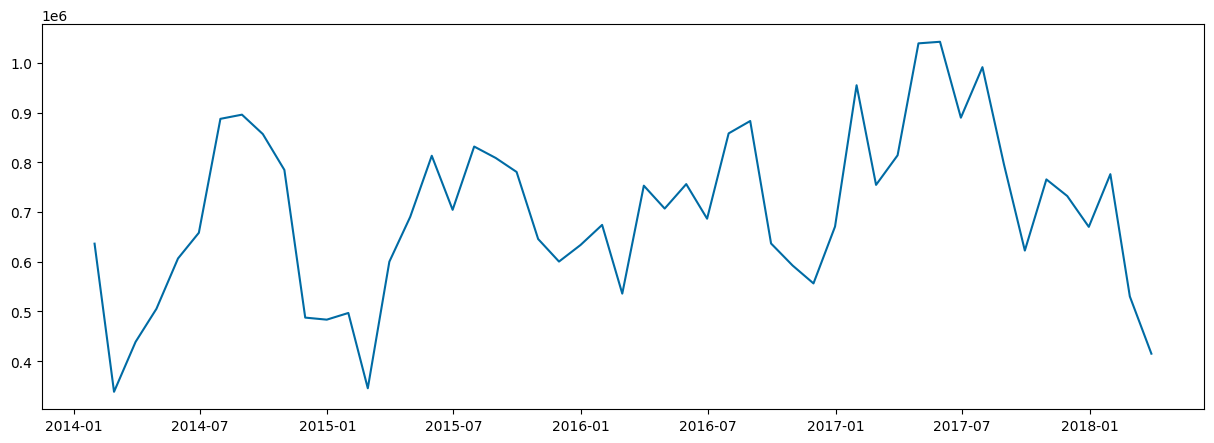

In [26]:
# Plote the data set
plt.figure(figsize = (15,5), dpi=100)
plt.plot(data_sub_smooth)

# 3. Time series analysis: decomposition

In [27]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub_smooth, model='additive')

In [28]:
# Define a fixed size for all special charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

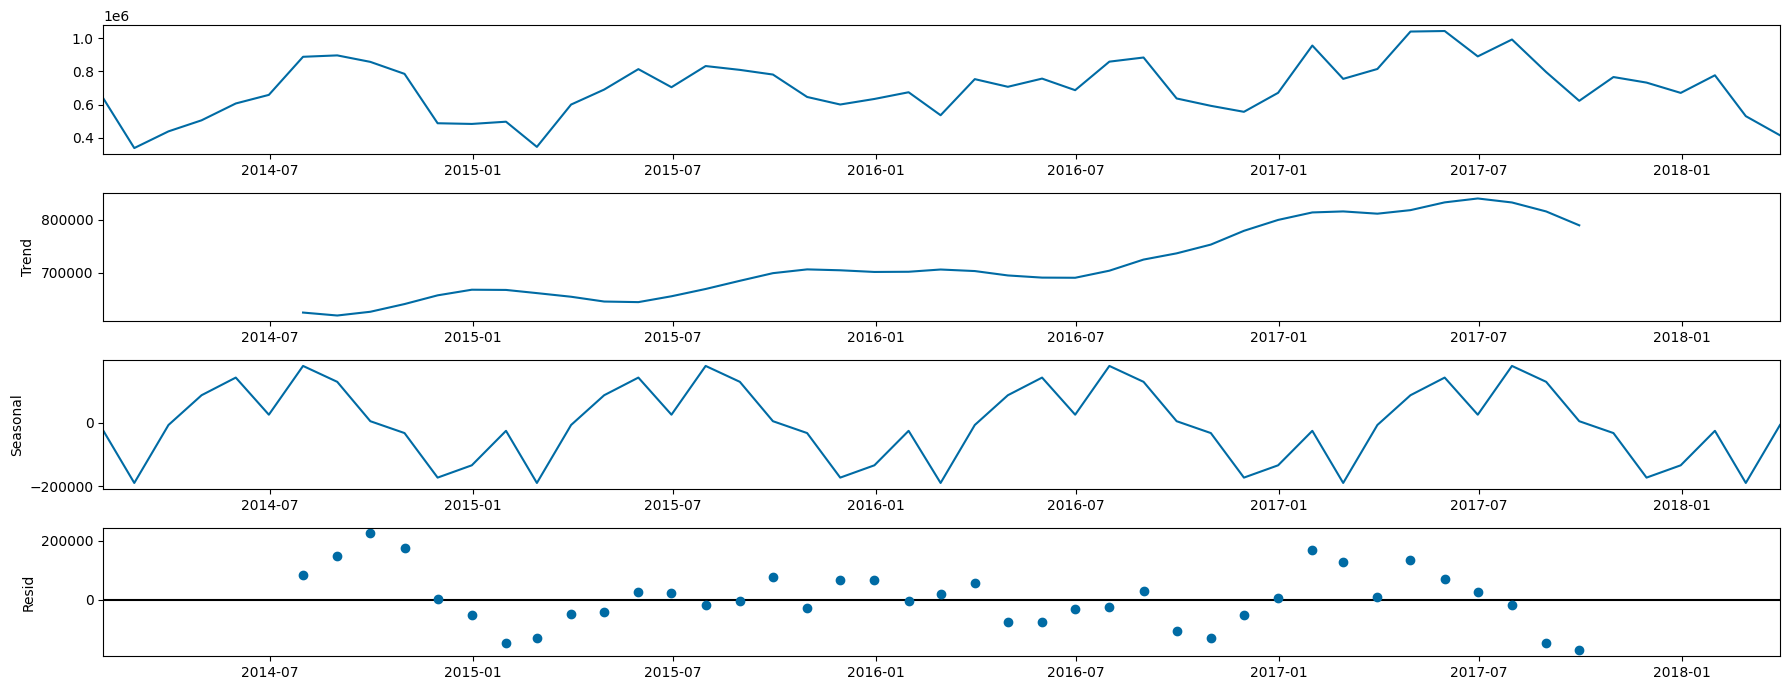

In [29]:
# Plot the separate components
decomposition.plot()
plt.show()

__Even after smoothening from daily to monthly counts of gun violence, the trend of increased incidents and a lot of residual noise is very apparent.  The time series does have strong seasonality - with peaks in the summer months and troughs in the winter months (more gun crime when people spend more time outside with better weather?).__

# 4. Testing for stationarity

In [30]:
# Conduct a Dickey_Fuller Stationarity test using the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function to print the array result
def dickey_fuller(timeseries):
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_smooth['gun_incident_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.041043
p-value                         0.031235
Number of Lags Used             0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


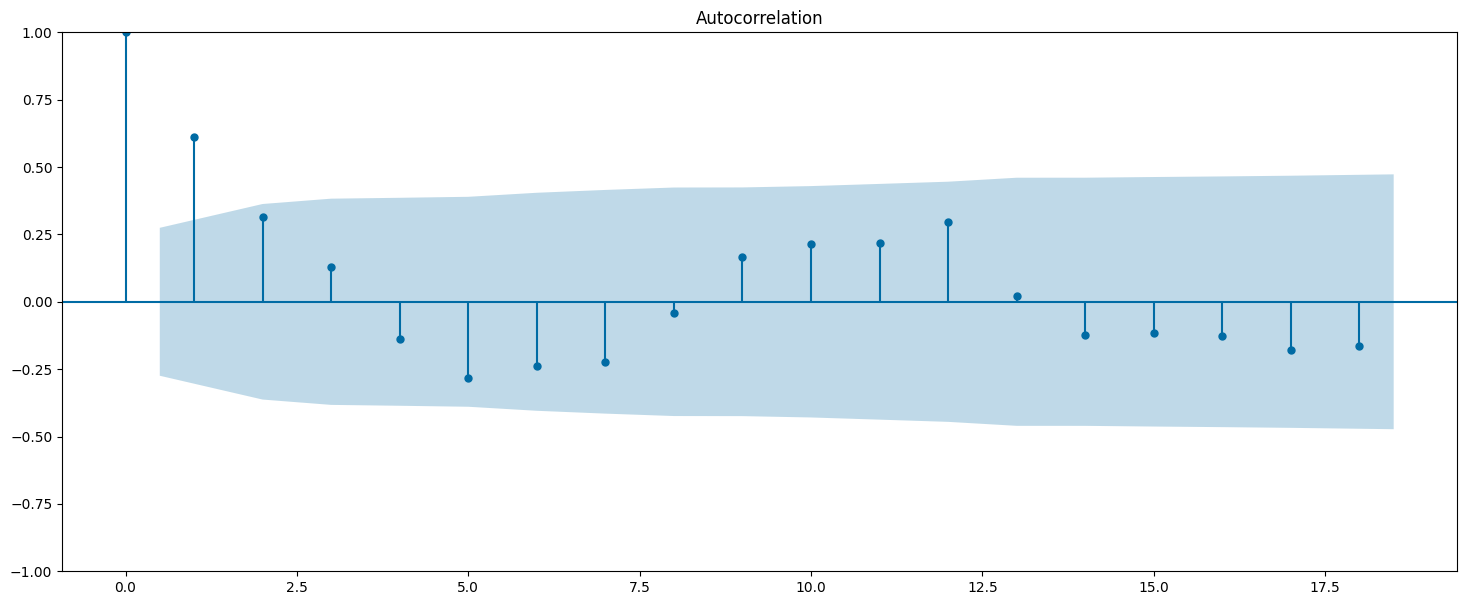

In [31]:
# Create a plot to check on autocorrelation using the plot_acf() function from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub_smooth)
plt.show()

__Both the Dickey-Fuller test and the check for autocorrelation show that the time series for gun violence incidents is stationary. The Test Statistic is less than the 5% and 10% Critical Value (but not less than the 1% Critical Value_ and it is significant with a p-value of <0.05. Also, there is very little autocorrelation.__  

__Therefore, it is not necessary to force stationarity on the data using Differencing or Log Transformation, but I will demonstrate how I would approach it in the next Section as part of the task.__

# 5.  Stationarizing the data set

In [32]:
# Apply the Differencing technique to the data set using the df.shift() function.
# Adding hashtag so the code doesn't actually run
#data_diff = data_sub_smooth - data_sub_smooth.shift(1)

In [33]:
# Code to Drop any missing values created from the differencing
# Adding hashtag so the code doesn't actually run
#data_diff.dropna(inplace = True)

In [34]:
# Check the results of the differencing by plotting the time series and re-running the Dickey-Fuller test and plotting those results
# Adding hashtag so the code doesn't actually run
#plt.figure(figsize=(15,5), dpi=100)
#plt.plot(data_diff)

#dickey_fuller(data_diff)

#plot_acf(data_diff)
#plt.show()

In [35]:
# Export the dataset and save the visualizations
data_sub_smooth.to_csv(os.path.join(path, '2_Data', 'Storyboard', 'time_series_gun.csv')) 